In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Minimize a convex function $f$

We can compute the gradient descent which computes $x^{j+1}=x^{j}-\alpha \nabla f(x^{j})$

Consider $f(x)=\frac{1}{2}(x_1 ^2 + \delta x_2 ^2)$

In [2]:
def conf(X,delta):
    x1=X[0]
    x2=X[1]
    return 0.5*(x1**2+delta*x2**2)

In [3]:
Xi=np.array([2,3])
conf(Xi,8)

38.0

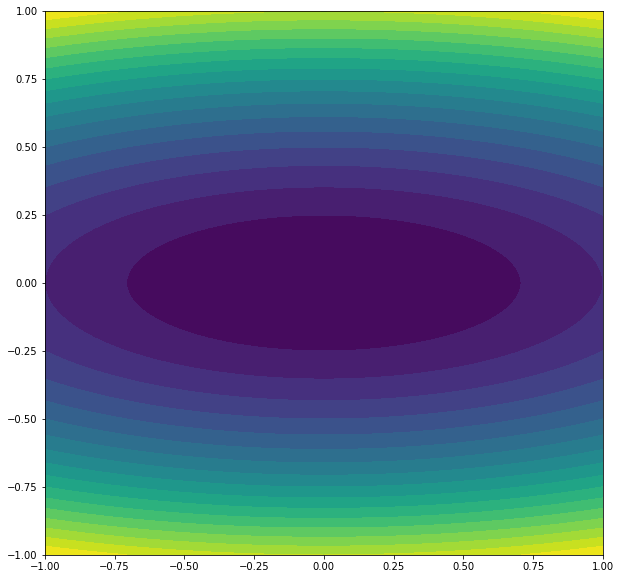

In [4]:
t=np.linspace(-1,1,101)
U,V=np.meshgrid(t,t)
F=(U**2+8*V**2)/2
plt.figure(figsize=(10,10))
plt.contourf(U,V,F,20)
plt.show()

In [5]:
def gradf(x1,x2,eta):
    return (np.array([x1, eta*x2]))

In [6]:
gradf(1,2,8)

array([ 1, 16])

In [7]:
def tau(eta):
    return 1.8/max(eta,1)

In [8]:
tau(8)

0.225

In [9]:
def gd(X,eta,ite):
    Y=X
    Fal=np.array([conf(X,eta)])
    for i in range(ite):
        X=X-tau(eta)*gradf(X[0],X[1],eta)
        Fal=np.append(Fal,conf(X,eta))
        Y=np.vstack((Y,X))
    return Y,Fal

In [10]:
gradval,fval=gd(np.array([0.6,0.6]),8,40)

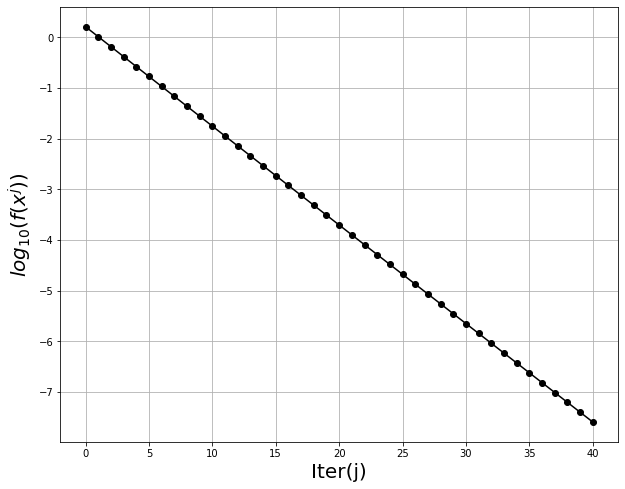

In [11]:
plt.figure(figsize=(10,8))
plt.plot(range(len(fval)),np.log10(fval),'ko-')
plt.xlabel('Iter(j)',fontsize=20)
plt.ylabel('$log_{10}(f(x^j))$',fontsize=20)
plt.grid()


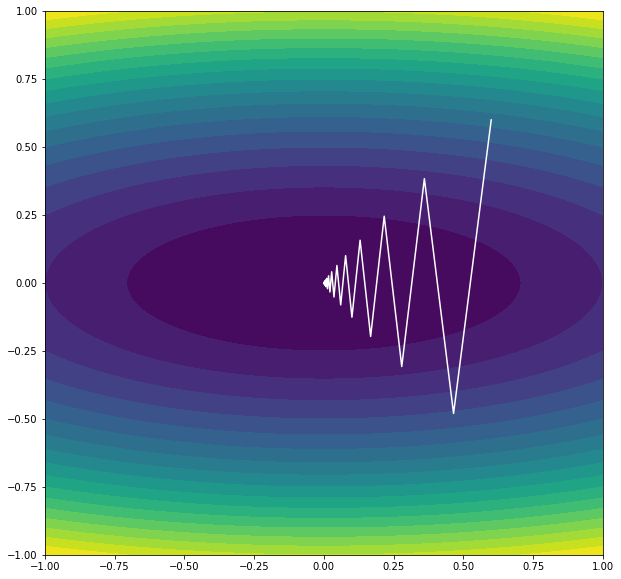

In [14]:
plt.figure(figsize=(10,10))
plt.contourf(U,V,F,20)
plt.plot(gradval[:,0],gradval[:,1],'w-')
plt.savefig('Conv.pdf')
plt.show()